## Part two: Logistic regression

For this lab we will be using sklearn and the other packages we used in the previous lab.

In [1]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

Read in our dataset as follows:

In [2]:
df = pd.read_csv('data/Titanic_Cleaned.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   SibSp         1309 non-null   int64  
 4   Parch         1309 non-null   int64  
 5   HasCabin      1309 non-null   bool   
 6   CatAge        1309 non-null   int64  
 7   CatFare       1309 non-null   int64  
 8   Sex_male      1309 non-null   bool   
 9   Embarked_Q    1309 non-null   bool   
 10  Embarked_S    1309 non-null   bool   
 11  Title_Miss    1309 non-null   bool   
 12  Title_Mr      1309 non-null   bool   
 13  Title_Mrs     1309 non-null   bool   
 14  Title_Unique  1309 non-null   bool   
dtypes: bool(8), float64(1), int64(6)
memory usage: 81.9 KB


,PassengerId,Survived,Pclass,SibSp,Parch,CatAge,CatFare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.498854,0.385027,1.381207,1.486631
std,378.020061,0.486592,0.837836,1.041658,0.865560,1.112474,1.122135
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
75%,982.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
max,1309.000000,1.000000,3.000000,8.000000,9.000000,3.000000,3.000000


### Task 1: Split the dataset
We will create two datasets, one for training our model and one to test it.

In [5]:
# Split the dataset
df_train = df[df['Survived'].notnull()]
df_test = df[df['Survived'].isnull()]

# Reset index (optional)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Check the shapes
print(f"Training set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")


Training set shape: (891, 15)
Test set shape: (418, 15)


In [6]:
# Save the test and train data as csv files so that it is easier to load them in the future
df_test.to_csv('data/test.csv', index=False)
df_train.to_csv('data/train.csv', index=False)

In [7]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,0.0,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1.0,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,1.0,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1.0,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,0.0,3,0,0,False,2,1,True,False,True,False,True,False,False


In [9]:
df_test.head()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,892,NaN,3,0,0,False,2,0,True,True,False,False,True,False,False
1,893,NaN,3,1,0,False,3,0,False,False,True,False,False,True,False
2,894,NaN,2,0,0,False,3,1,True,True,False,False,True,False,False
3,895,NaN,3,0,0,False,1,1,True,False,True,False,True,False,False
4,896,NaN,3,1,1,False,0,1,False,False,True,False,False,True,False


### Task 2: New Feature: TravelAlone

According to the Kaggle data dictionary(https://www.kaggle.com/c/titanic/data), both SibSp and Parch relate to traveling with family. For simplicity's sake, we combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [10]:
# Create 'TravelAlone' feature
df_train['TravelAlone'] = np.where((df_train['SibSp'] + df_train['Parch']) > 0, 0, 1)

# Alternative method
# df_train['TravelAlone'] = ((df_train['SibSp'] + df_train['Parch']) == 0).astype(int)

# View the new feature
df_train[['SibSp', 'Parch', 'TravelAlone']].head()


,SibSp,Parch,TravelAlone
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [11]:
# Drop the 'SibSp' & 'Parch' columns as they are no longer needed
df_train.drop('SibSp', axis=1, inplace=True) # Drop SibSp column as it is no longer needed
df_train.drop('Parch', axis=1, inplace=True) # Drop Parch column as it is no longer needed

In [12]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'HasCabin', 'CatAge', 'CatFare',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Unique', 'TravelAlone'],
      dtype='object')

### Task 3: Exploring our data

Apparently the passengers tried to save children and women. Let's explore our data and see if this is largely true.

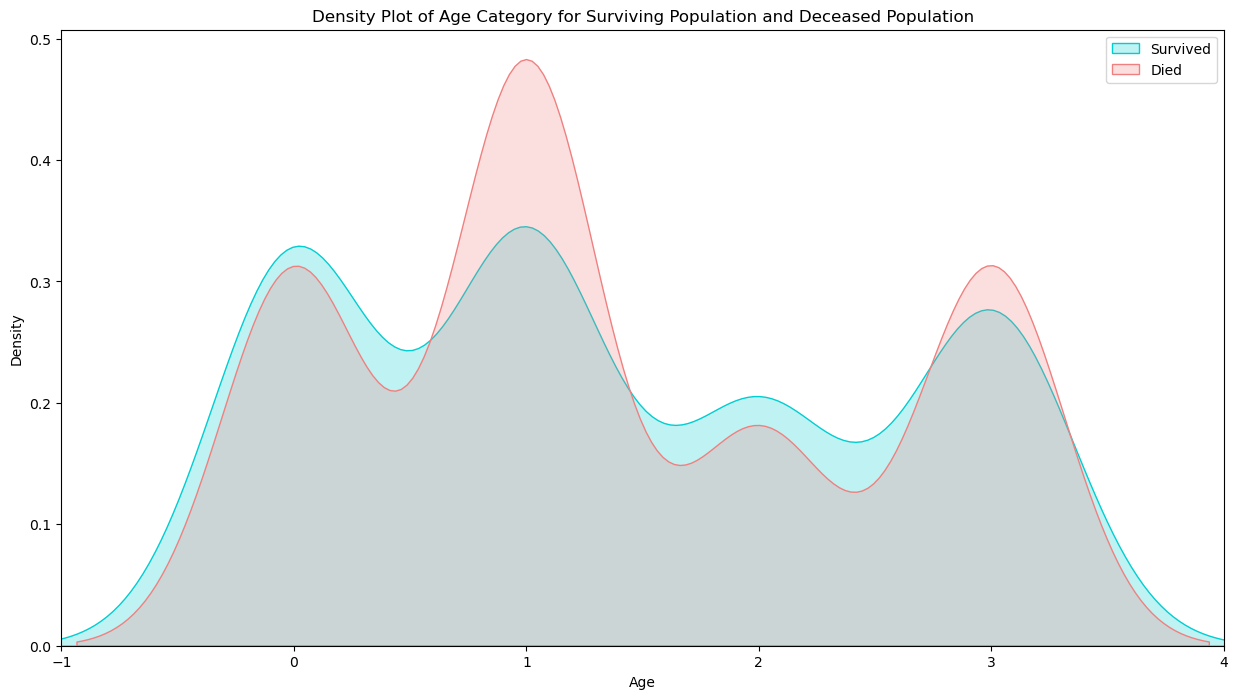

In [13]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatAge"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatAge"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age Category for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-1,4)
plt.show()

People from category 0 and 1 where the biggest "winners" in survival rate, but cat 1 also has the biggest death rate.

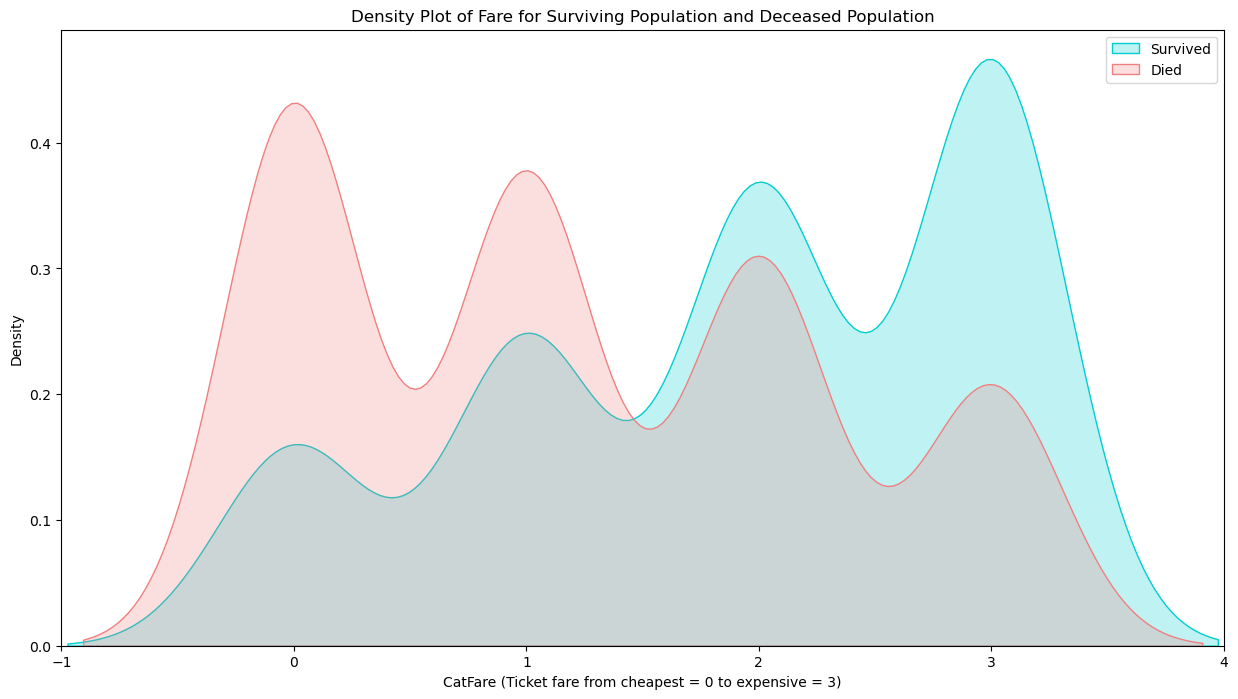

In [14]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatFare"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatFare"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='CatFare (Ticket fare from cheapest = 0 to expensive = 3)')
plt.xlim(-1,4)
plt.show()

Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next...

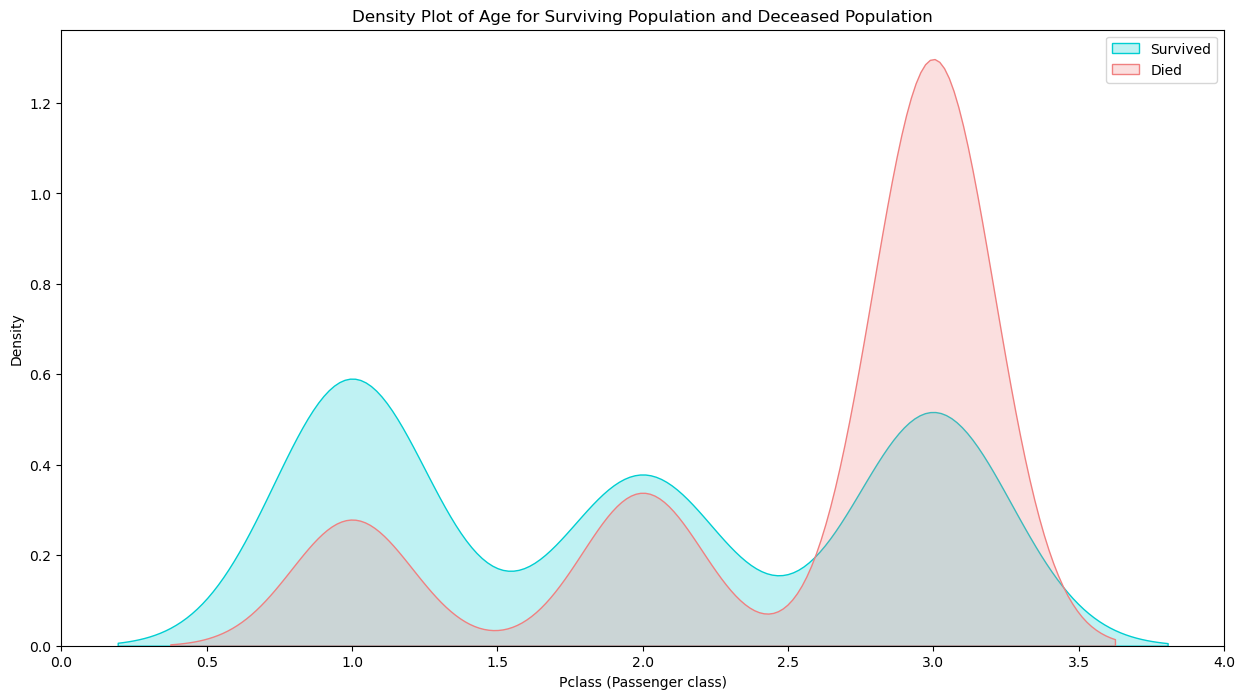

In [15]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Pclass"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Pclass"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Pclass (Passenger class)')
plt.xlim(0,4)
plt.show()

Surprise, surprise, being in first class was the safest...

What about gender?

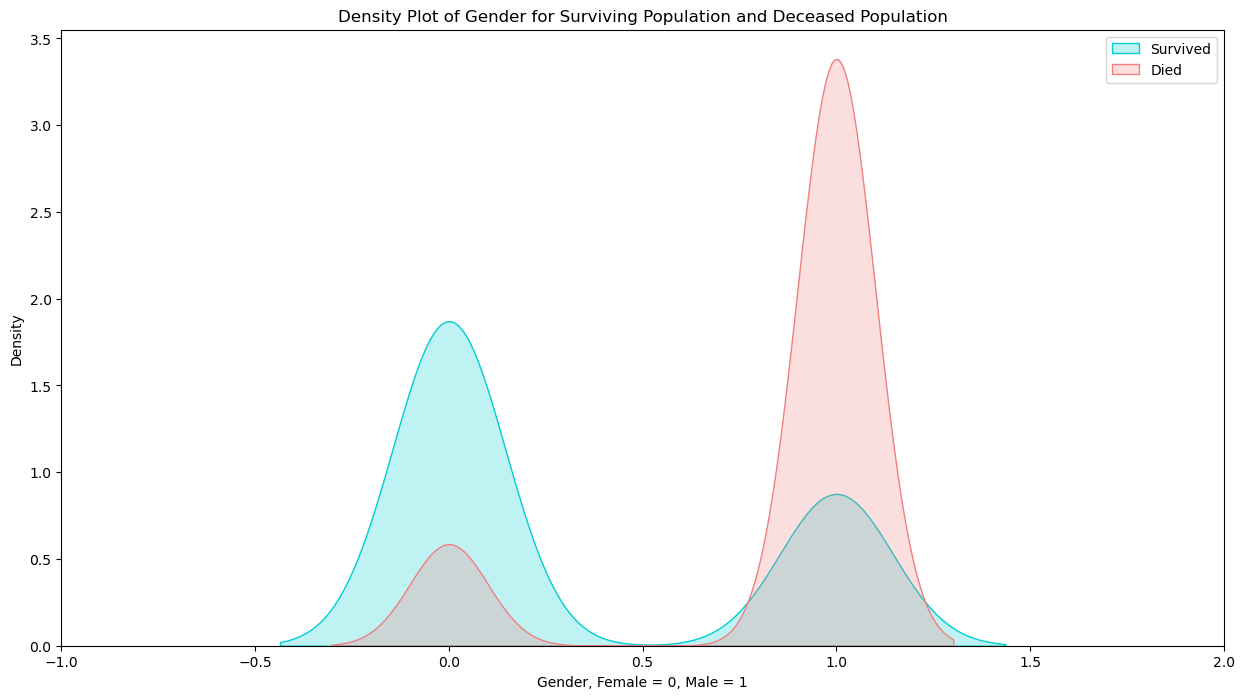

In [16]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Sex_male"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Sex_male"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Gender for Surviving Population and Deceased Population')
ax.set(xlabel='Gender, Female = 0, Male = 1')
plt.xlim(-1,2)
plt.show()

The passengers evidently prioritised saving women and children.

What about those who traveled alone?

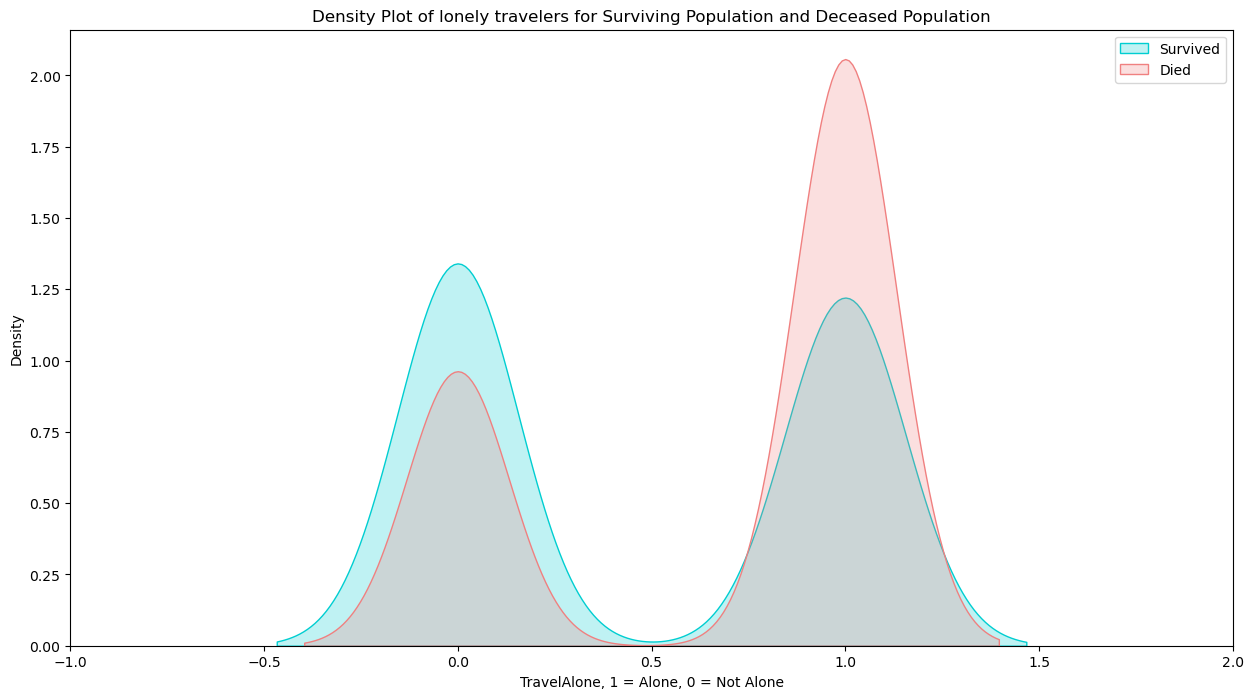

In [17]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of lonely travelers for Surviving Population and Deceased Population')
ax.set(xlabel='TravelAlone, 1 = Alone, 0 = Not Alone')
plt.xlim(-1,2)
plt.show()

Significantly more people who traveled alone died. Why is that?

## Logistic Regression

## Task 4: Compute correlation matrix

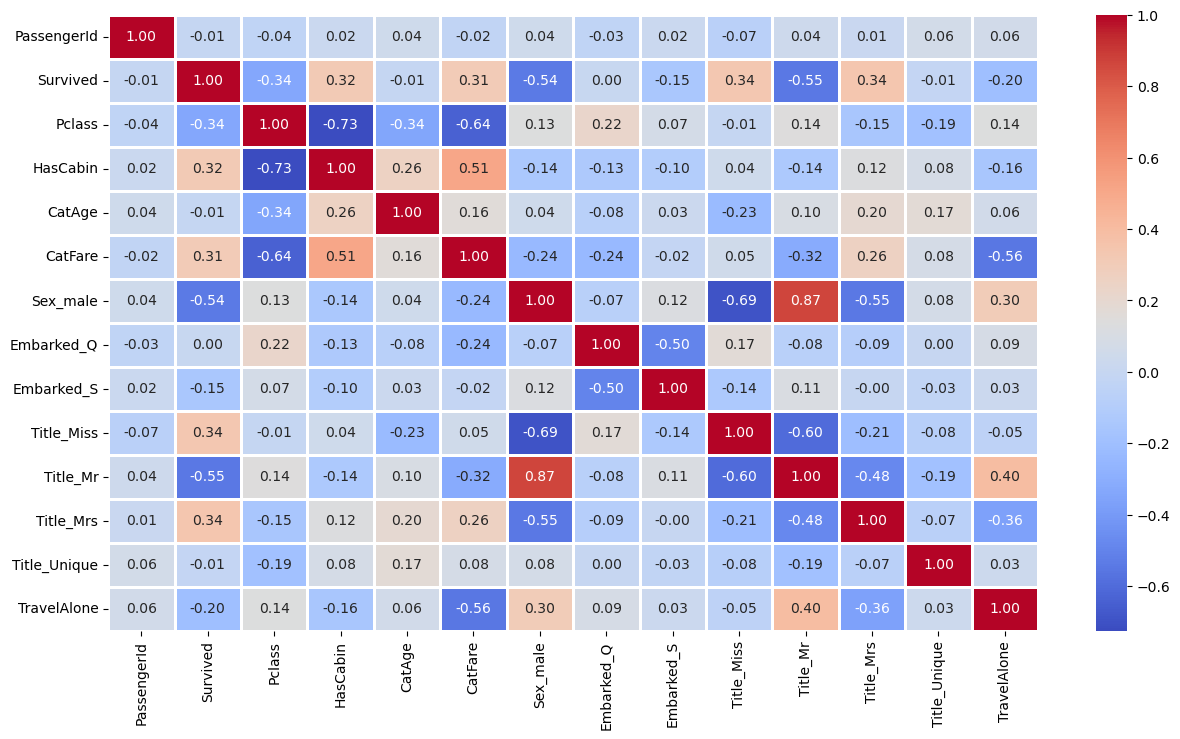

In [18]:
# Correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In [19]:
"""
# Getting the age from the previous lab's data
old_df = pd.read_csv('../Lab2/data/Titanic.csv')

# Extract the age column from old_df
age = old_df['Age']

#Fill missing values - we'll use the median since the data is right skewed.
age.fillna(age.median(), inplace=True)

# Insert Age back into train_df
df_train['Age'] = age

# Create age column where age is less than 16
df_train.loc[:, 'Child'] = np.where(df_train['Age'] < 16, 1, 0)

# Drop the 'Age' column as it is no longer needed
df_train.drop('Age', axis=1, inplace=True)

# View survival rate of new feature, child
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Child"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Child"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Child Category for Surviving Population and Deceased Population')
ax.set(xlabel='Child')
plt.xlim(-1,4)
plt.show()

# Correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()
"""

'\n# Getting the age from the previous lab\'s data\nold_df = pd.read_csv(\'../Lab2/data/Titanic.csv\')\n\n# Extract the age column from old_df\nage = old_df[\'Age\']\n\n#Fill missing values - we\'ll use the median since the data is right skewed.\nage.fillna(age.median(), inplace=True)\n\n# Insert Age back into train_df\ndf_train[\'Age\'] = age\n\n# Create age column where age is less than 16\ndf_train.loc[:, \'Child\'] = np.where(df_train[\'Age\'] < 16, 1, 0)\n\n# Drop the \'Age\' column as it is no longer needed\ndf_train.drop(\'Age\', axis=1, inplace=True)\n\n# View survival rate of new feature, child\nplt.figure(figsize=(15,8))\nax = sns.kdeplot(df_train["Child"][df_train.Survived == 1], color="darkturquoise", fill=True)\nsns.kdeplot(df_train["Child"][df_train.Survived == 0], color="lightcoral", fill=True)\nplt.legend([\'Survived\', \'Died\'])\nplt.title(\'Density Plot of Child Category for Surviving Population and Deceased Population\')\nax.set(xlabel=\'Child\')\nplt.xlim(-1,4)\npl

## Task 5: Perform feature selection wiht RFE 

Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning to identify the most important features in a dataset. 

It works by iteratively eliminating less important features from the dataset until a desired number of features remains. 

The importance of features is determined using a metric such as coefficients in linear models or feature importances in tree-based models. 

RFE helps reduce the dimensionality of a dataset, improve model interpretability, and enhance model performance by selecting the subset of features with the most predictive power while discarding irrelevant or redundant features.

References:
http://scikit-learn.org/stable/modules/feature_selection.html

In [20]:
# 1. Prepare the data
X = df_train.drop(['PassengerId', 'Survived'], axis=1)
y = df_train['Survived']

# If there are categorical variables, make sure to encode them appropriately
# For example:
# X = pd.get_dummies(X, drop_first=True)

# 2. Initialize the model
model = LogisticRegression(max_iter=1000)

# 3. Perform RFE
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X, y)

# 4. List the selected features
selected_features = X.columns[rfe.support_]
print('Selected features:', selected_features)


Selected features: Index(['Pclass', 'HasCabin', 'Sex_male', 'Embarked_S', 'Title_Miss',
       'Title_Mr', 'Title_Unique', 'TravelAlone'],
      dtype='object')


## Task 6: Build and Evaluate the Logistic Regression Model

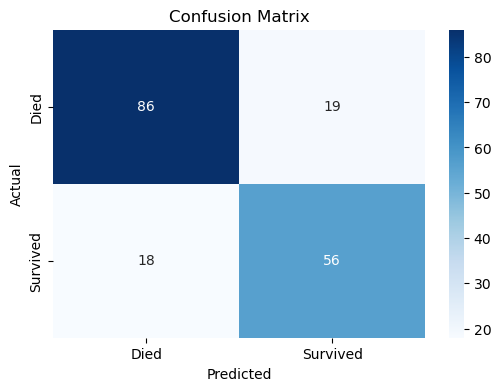

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       105
         1.0       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 1. Split the data
X = df_train[selected_features]
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Evaluate the model
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


### Confusion matrix
The confusion matrix is a popular tool used in machine learning to evaluate the performance of a classification model. It provides a summary of the predictions made by the model compared to the actual labels of the data.

The confusion matrix is a square matrix with dimensions equal to the number of classes in the classification problem. In this case, we are working with a binary classification problem, so the confusion matrix will be a 2x2 matrix.

The four quadrants of the confusion matrix are as follows:

1. **True Positives (TP)**: This quadrant represents the cases where the model correctly predicted the positive class (survived). These are the passengers who were correctly classified as survivors.

2. **True Negatives (TN)**: This quadrant represents the cases where the model correctly predicted the negative class (not survived). These are the passengers who were correctly classified as non-survivors.

3. **False Positives (FP)**: This quadrant represents the cases where the model incorrectly predicted the positive class (survived). These are the passengers who were incorrectly classified as survivors when they did not actually survive.

4. **False Negatives (FN)**: This quadrant represents the cases where the model incorrectly predicted the negative class (not survived). These are the passengers who were incorrectly classified as non-survivors when they actually survived.

The confusion matrix provides a visual representation of these four quadrants, allowing us to assess the performance of the model in terms of accuracy, precision, recall, and other metrics. It helps us understand how well the model is performing and identify any patterns or biases in its predictions.

In our case, the positive class represents the passengers who survived, and the negative class represents the passengers who did not survive.

Here's an example of a confusion matrix:

<img src='img/confusionmatrix.png'>

## Task 7: Understand Evaluation Metrics

Accuracy: 0.79
Log Loss: 0.43
AUC: 0.87


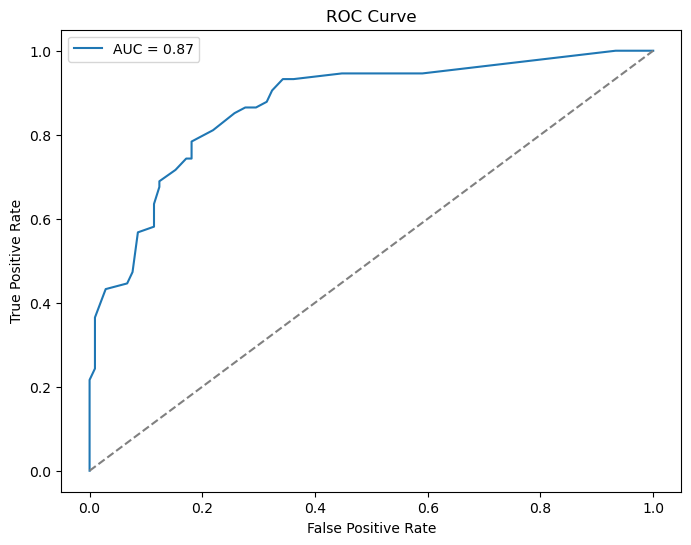

In [22]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, roc_curve

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Log Loss
y_pred_proba = model.predict_proba(X_test)[:,1]
logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {logloss:.2f}')

# AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc:.2f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Accuracy, log_loss and AUC
* **Accuracy**: is a metric used to evaluate the performance of a classification model. It measures the percentage of correctly predicted instances out of the total instances.

* **Log Loss**: also known as logarithmic loss or cross-entropy loss, is a metric used to evaluate the performance of a classification model that outputs probabilities. It measures the difference between the predicted probabilities and the true labels.

* **AUC (Area Under the Curve)**: is a metric used to evaluate the performance of a binary classification model. It represents the area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate against the false positive rate at various classification thresholds. AUC provides an aggregate measure of the model's ability to discriminate between positive and negative instances.


## Task 8: Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Accuracy
scores_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(f'Average Accuracy: {scores_accuracy.mean():.2f}')

# Log Loss
scores_log_loss = cross_val_score(model, X, y, cv=10, scoring='neg_log_loss')
print(f'Average Log Loss: {-scores_log_loss.mean():.2f}')

# AUC
scores_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f'Average AUC: {scores_auc.mean():.2f}')


Average Accuracy: 0.81
Average Log Loss: 0.44
Average AUC: 0.86
